<a href="https://colab.research.google.com/github/kanaparthiphani1/AI/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
#Load Images using PIL

image = Image.open('lion.webp').convert("L")
image = image.resize((256,256))
image = np.array(image, dtype=np.float32)/255.0

In [4]:
#Expanding dimensions
image = np.expand_dims(image, axis=(0,-1))


In [5]:
#filters
vertical_filter = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
], dtype=np.float32)

horizontal_filter = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
], dtype=np.float32)

In [6]:
#reshape filters (H,W,in_channels,out_channels)
vertical_filter = vertical_filter.reshape((3,3,1,1))
horizontal_filter = horizontal_filter.reshape((3,3,1,1))

In [7]:
#Applying Convolutions
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1,1,1,1], padding="SAME")
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1,1,1,1], padding="SAME")

In [8]:
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

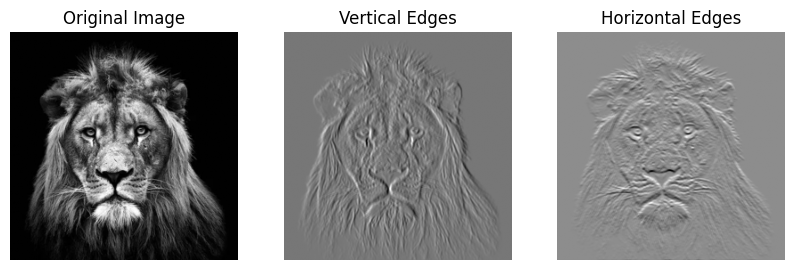

In [9]:
# Plot original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap="gray")
plt.title("Vertical Edges")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap="gray")
plt.title("Horizontal Edges")
plt.axis("off")

plt.show()

# **Blur Filter**

In [12]:
blur_filter = np.array([[1/12,1/12,1/12],[1/12,1/12,1/12],[1/12,1/12,1/12]], dtype= np.float32)
blur_filter = blur_filter.reshape((3,3,1,1))

blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1,1,1,1], padding="SAME")
blurred_image = blurred_image.numpy().squeeze()

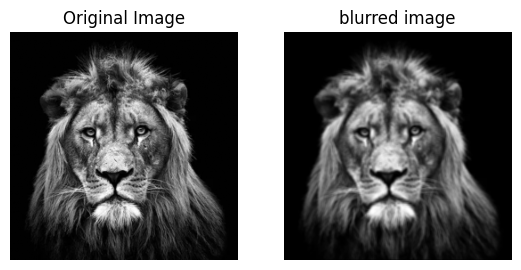

In [13]:
# Plot original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap="gray")
plt.title("blurred image")
plt.axis("off")


plt.show()